#Практическая работа №4: Элементы корреляционного анализа. Проверка статистической гипотезы о равенстве коэффициента корреляции нулю

Выполнили студенты гр. 0381 Лаари Екатерина и Захаров Филипп. Вариант №9

## Цель работы

Освоение основных понятий, связанных с корреляционной зависимостью между случайными величинами, статистическими гипотезами и проверкой их «справедливости».

##Основные теоретические положения

Корреляционной называют статистическую зависимость двух
случайных величин, при которой изменение значения одной из случайных величин приводит к изменению математического ожидания другой случайной величины.

$$M(X/y) = q_1(y)$$
$$M(Y/x) = q_2(x)$$

Эти функции называют функциями регрессии.
Корреляционный момент - это:
$$\mu_{xy} = M([x-M(X)] * [y-M(y)])$$

Коэффициент корреляции - это:
$$r_{xy} = \frac{\mu_{xy}}{ \sigma_x  \sigma_y}$$

Для коэффициента корреляции справедливо соотношение:
$$|r_{xy}| <= 1$$

Случайные величины X и Y называют коррелированными, если их
корреляционный момент или их коэффициент корреляции отличен от нуля. В противном случае эти величины некоррелированы.

Если случайные величины X и Y коррелированы, то они зависимы.

Оценка корреляционного коэффициента вычисляется как:

$$\overline{r}_{xy}= \frac{\sum_{i=1}^{K_y}\sum_{j=1}^{K_x}[n_{ij}y_ix_j]-N\overline{x}_B\overline{y}_B}{NS_xS_y}$$

Для проверки значимости выборочного коэффициента корреляции
нулевая гипотеза формулируется так, что $$r_{xy} = 0$$ Для вычисления наблюдаемого значения используется следующая формула:

$$T_{набл} = \frac{\overline{r}_{xy}\sqrt{N-2}}{\sqrt{1-r_{xy}^{-2}}}$$

При справедливости нулевой гипотезы эта случайная величина
сходится к распределению Стьюдента с степенями свободы 𝑑𝑓 = 𝑁 − 2.
Поскольку распределение Стьюдента симметричное, то критическая
область в данном случае также двусторонняя.


##Постановка задачи
Из заданной генеральной совокупности сформировать выборку по второму признаку. Провести статистическую обработку второй выборки в объёме практических работ №1 и №2, с целью определения точечных статистических оценок параметров распределения исследуемого признака (математического ожидания, дисперсии, среднеквадратичного отклонения, асимметрии, эксцесса и коэффициента вариации). Для системы двух случайных величин
X
 (первый признак) и
Y
 (второй признак) сформировать двумерную выборку и найти статистическую оценку коэффициента корреляции, построить доверительный интервал для коэффициента корреляции и осуществить проверку статистической гипотезы о равенстве коэффициента корреляции нулю. Полученные результаты содержательно проинтерпретировать.

Инициализация выборки

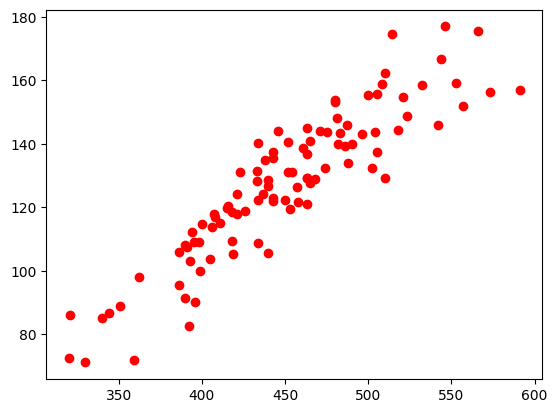

In [1]:
import matplotlib.pyplot as plt


data = {'A': [ 480, 510, 426, 482, 393, 510, 542, 437, 453, 386, 434, 418, 391, 399, 486, 421, 496, 463, 508, 419, 434, 440, 405, 434, 344,
              415, 463,475,463,392,452,504,443,461,340,438,523,416,483,440,423,386,321,433,351,481,465,390,463,468,488,443,505,395,474,490,
               396,362,566,418,502,500,359,443,421,433,514,320,406,465,487,532,330,458,408,480,573,518,394,440,443,452,521,471,398,446,400,
               457,407,505,390,557,591,450, 546, 454, 553, 544, 463, 411],
        'B': [153.3,129.4,119,139.9,103.2,162.3,146.1,124.3,119.5,105.8,122.3,118.4,107.5,100,139.4,124.2,143.1,121.2,159,105.3,108.7,126.7,
              103.6,140.4,86.8,119.7,136.7,143.6,144.9,82.7,140.5,143.8,122.9,138.6,85.1,134.9,148.7,120.5,143.4,128.5,131.1,95.5,86.1,131.5,
              89,148.3,127.7,108.1,129.2,128.9,134.1,137.4,155.8,109.1,132.5,139.9,90.1,97.9,175.7,109.3,132.5,155.5,71.9,135.7,118,128.2,174.6,
              72.6,113.8,140.9,146,158.7,71.1,121.7,117,153.9,156.5,144.4,112.1,105.7,121.9,131,154.9,143.9,109,144,114.6,126.4,118,137.5,91.4,
              151.9,156.9,122.3,177,131.1,159.1,166.7,129.1,115.2]}

N = 100 # Размер выборки
plt.scatter(data["A"], data["B"], c ="red")

1. Провести статистическую обработку второй выборки в объеме практических работ №1 и №2, с целью определения точечных статистических оценок параметров распределения исследуемого признака (математического ожидания, дисперсии, среднеквадратичного отклонения, асимметрии, эксцесса, моды, медианы и коэффициента вариации). Оформить результаты в виде таблицы, сделать выводы.

Ранжированный ряд

In [2]:
print(*sorted(data["B"]))

71.1 71.9 72.6 82.7 85.1 86.1 86.8 89 90.1 91.4 95.5 97.9 100 103.2 103.6 105.3 105.7 105.8 107.5 108.1 108.7 109 109.1 109.3 112.1 113.8 114.6 115.2 117 118 118 118.4 119 119.5 119.7 120.5 121.2 121.7 121.9 122.3 122.3 122.9 124.2 124.3 126.4 126.7 127.7 128.2 128.5 128.9 129.1 129.2 129.4 131 131.1 131.1 131.5 132.5 132.5 134.1 134.9 135.7 136.7 137.4 137.5 138.6 139.4 139.9 139.9 140.4 140.5 140.9 143.1 143.4 143.6 143.8 143.9 144 144.4 144.9 146 146.1 148.3 148.7 151.9 153.3 153.9 154.9 155.5 155.8 156.5 156.9 158.7 159 159.1 162.3 166.7 174.6 175.7 177


Вариационный ряд

In [3]:
from collections import Counter
variational_series_counter = Counter(data["B"])

for item in sorted(variational_series_counter):
  print(item, end='\t')
print()
for item in sorted(variational_series_counter):
  print(variational_series_counter[item], end='\t')

71.1	71.9	72.6	82.7	85.1	86.1	86.8	89	90.1	91.4	95.5	97.9	100	103.2	103.6	105.3	105.7	105.8	107.5	108.1	108.7	109	109.1	109.3	112.1	113.8	114.6	115.2	117	118	118.4	119	119.5	119.7	120.5	121.2	121.7	121.9	122.3	122.9	124.2	124.3	126.4	126.7	127.7	128.2	128.5	128.9	129.1	129.2	129.4	131	131.1	131.5	132.5	134.1	134.9	135.7	136.7	137.4	137.5	138.6	139.4	139.9	140.4	140.5	140.9	143.1	143.4	143.6	143.8	143.9	144	144.4	144.9	146	146.1	148.3	148.7	151.9	153.3	153.9	154.9	155.5	155.8	156.5	156.9	158.7	159	159.1	162.3	166.7	174.6	175.7	177	
1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	2	1	1	1	1	1	1	1	1	2	1	1	1	1	1	1	1	1	1	1	1	1	1	2	1	2	1	1	1	1	1	1	1	1	2	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	

В выборке достаточно мало повторяющихся значений.

Интервальный ряд

In [4]:
import math
intervals_number = int(1 + 3.322 * math.log10(N))
min_density, max_density = min(data["B"]), max(data["B"])
range_density = max_density - min_density
print("Используя формулу Стерджеса оптимальное количество интервалов для разбиения выборки: ", intervals_number)
print("Минимальное значение ряда: ", min_density)
print("Максимальное значение ряда:", max_density)
print("Размах выборки", range_density)


Используя формулу Стерджеса оптимальное количество интервалов для разбиения выборки:  7
Минимальное значение ряда:  71.1
Максимальное значение ряда: 177
Размах выборки 105.9


In [5]:
isInInterval = lambda x: min(int((abs(x) - min_density) / range_density * intervals_number), intervals_number - 1)
borders = [((min_density + range_density) / intervals_number * i, (min_density + range_density) / intervals_number * (i + 1))
           for i in range(intervals_number)]
intervals = [[] for i in range(intervals_number)]

for value in data["B"]:
    intervals[isInInterval(value)].append(value)

intervals = [sorted(i) for i in intervals]

print("i |       Интервал      | Середина интервала | Абс. частота | Отн. частота | Накоп. абс. частота | Накоп. отн. частота |")
for i, interval in enumerate(intervals):
    print(f"{i + 1} | [{interval[0]:.3f} - {interval[-1]:.3f}) |", end=" ")
    print(f"{((intervals[i][0] + intervals[i][-1]) / 2):^18.2f} |", end=" ")
    print(f"{len(intervals[i]):^13.3f}| {len(intervals[i]) / N:^13.3f}|", end=" ")
    print(f"{sum([len(k) for k in intervals[:i + 1]]):^20.3f}|", end=" ")
    print(f"{sum([len(k) for k in intervals[:i + 1]]) / N:^20.3f}|")

i |       Интервал      | Середина интервала | Абс. частота | Отн. частота | Накоп. абс. частота | Накоп. отн. частота |
1 | [71.100 - 86.100) |       78.60        |     6.000    |     0.060    |        6.000        |        0.060        |
2 | [86.800 - 100.000) |       93.40        |     7.000    |     0.070    |        13.000       |        0.130        |
3 | [103.200 - 115.200) |       109.20       |    15.000    |     0.150    |        28.000       |        0.280        |
4 | [117.000 - 131.500) |       124.25       |    29.000    |     0.290    |        57.000       |        0.570        |
5 | [132.500 - 146.100) |       139.30       |    25.000    |     0.250    |        82.000       |        0.820        |
6 | [148.300 - 159.100) |       153.70       |    13.000    |     0.130    |        95.000       |        0.950        |
7 | [162.300 - 177.000) |       169.65       |     5.000    |     0.050    |       100.000       |        1.000        |


In [6]:
from collections import Counter

s = 0
counter = Counter(data["B"])
for i in counter:
  s += counter[i] / N * i

print("Выборочное среднее")
print("Стандартная формула:", s)

Выборочное среднее
Стандартная формула: 127.33799999999998


In [7]:
dis = 0
for i in data["B"]:
  dis += (i - s) ** 2
dis /= N
print("Выборочную дисперсия", dis)
print("Исправленная оценка дисперсии", N / (N - 1) * dis)
print("Статистическая оценка СКО", math.sqrt(N / (N - 1) * dis))

Выборочную дисперсия 536.8319559999999
Исправленная оценка дисперсии 542.254501010101
Статистическая оценка СКО 23.286358689372218


In [8]:
from scipy.stats import skew, kurtosis

print("Асимметрия", skew(data["B"], bias=False))
print("Эксцесс", kurtosis(data["B"], bias=False))


Асимметрия -0.2978876069511515
Эксцесс -0.1337094506701808


По частоте встречающихся чисел в интервалах можно предварительно сказать, что выборка имеет нормальное распределение.

Модальный интервал [117.000 - 131.500) - номер 4, т.к. ему соответствует наибольшая частота. Тогда

$X_{M_0} = 117$

$f_{M_0} = 29$

$h_{M_0} = 14.5$

$f_{M_{0-1}} = 15$

$f_{M_{0+1}} = 25$

$M_0 = 117 + 14.5 * \frac{29 - 15}{(29 - 15) + (29-25)} = 128.28$

Мода вариационного ряда равна 128.28, следовательно большинство чисел имеет значение, близкое к 128.28.

Четвертый интервал имеет накопленную абсолютную частоту более 50, следовательно является медианным интервалом, тогда:

$X_{M_e} = 117$

$f_{M_e} = 29$

$h_{M_e} = 14.5$

$S_{M_{e-1}} = 28$

$M_e = 117 + 14.5 * \frac{50 - 28}{29} = 128$

128 - медиана вариацинного ряда. Половина чисел принимает значение меньшее, чем 128, а половина большее.

In [9]:
print(math.sqrt(N / (N - 1) * dis) / s * 100)

18.28704604232218


Точечные оценки для выборки data["A"] были вычислены в практических работах 2, 3. <br>
Точечные оценки для выборки data["B"] были вычислены выше.

\begin{array}{ccc}
Точечная\ оценка&data["A"]&data["B"]\\
Мат. ожидание\ \overline X&449.79&127.34\\
Дисперсия\ D&3229.24&536.83\\
СКО\ \sigma&57.11&23.29\\
Асимметрия&0.09&-0.30\\
Эксцесс&-0.38&-0.13\\
Мода&451.80&128.28\\
Медиана&450.21&128\\
Коэффициент\ вариации&12.70&18.29\\
\end{array}

На данном этапе можно заподозрить наличие какой-то корреляционной зависимости, но для более определенных выводов необходим более глубокий анализ.

2. Построить двумерный интервальный вариационный ряд, оформить в виде таблицы.

In [10]:
import math
intervals_numberA = int(1 + 3.322 * math.log10(N))
min_densityA, max_densityA = min(data["A"]), max(data["A"])
range_densityA = max_densityA - min_densityA

intervals_numberB = int(1 + 3.322 * math.log10(N))
min_densityB, max_densityB = min(data["B"]), max(data["B"])
range_densityB = max_densityB - min_densityB

In [11]:
isInIntervalA = lambda x: min(int((abs(x) - min_densityA) / range_densityA * intervals_numberA), intervals_numberA - 1)
bordersA = [((min_densityA + range_densityA) / intervals_numberA * i, (min_densityA + range_densityA) / intervals_numberA * (i + 1))
           for i in range(intervals_numberA)]
intervalsA = [[] for i in range(intervals_numberA)]

for value in data["A"]:
    intervalsA[isInIntervalA(value)].append(value)

intervalsA = [sorted(i) for i in intervalsA]
print("Количество интервалов A:", len(intervalsA))
print(intervalsA)

isInIntervalB = lambda x: min(int((abs(x) - min_densityB) / range_densityB * intervals_numberB), intervals_numberB - 1)
bordersB = [((min_densityB + range_densityB) / intervals_numberB * i, (min_densityB + range_densityB) / intervals_numberB * (i + 1))
           for i in range(intervals_numberB)]
intervalsB = [[] for i in range(intervals_numberB)]

for value in data["B"]:
    intervalsB[isInIntervalB(value)].append(value)

intervalsB = [sorted(i) for i in intervalsB]
print("Количество интервалов B:", len(intervalsB))
print(intervalsB)

Количество интервалов A: 7
[[320, 321, 330, 340, 344, 351], [359, 362, 386, 386, 390, 390, 391, 392, 393, 394, 395, 396], [398, 399, 400, 405, 406, 407, 408, 411, 415, 416, 418, 418, 419, 421, 421, 423, 426, 433, 433, 434, 434, 434], [437, 438, 440, 440, 440, 443, 443, 443, 443, 446, 450, 452, 452, 453, 454, 457, 458, 461, 463, 463, 463, 463, 463, 465, 465, 468, 471, 474], [475, 480, 480, 481, 482, 483, 486, 487, 488, 490, 496, 500, 502, 504, 505, 505, 508, 510, 510], [514, 518, 521, 523, 532, 542, 544, 546], [553, 557, 566, 573, 591]]
Количество интервалов B: 7
[[71.1, 71.9, 72.6, 82.7, 85.1, 86.1], [86.8, 89, 90.1, 91.4, 95.5, 97.9, 100], [103.2, 103.6, 105.3, 105.7, 105.8, 107.5, 108.1, 108.7, 109, 109.1, 109.3, 112.1, 113.8, 114.6, 115.2], [117, 118, 118, 118.4, 119, 119.5, 119.7, 120.5, 121.2, 121.7, 121.9, 122.3, 122.3, 122.9, 124.2, 124.3, 126.4, 126.7, 127.7, 128.2, 128.5, 128.9, 129.1, 129.2, 129.4, 131, 131.1, 131.1, 131.5], [132.5, 132.5, 134.1, 134.9, 135.7, 136.7, 137.4, 1

In [12]:
import numpy as np
two_demension_interval = np.zeros((len(intervalsA), len(intervalsB)))

for i in range(N):
  for interval in range(len(intervalsA)):
    if data["A"][i] in intervalsA[interval]:
      intervalA = interval
      break
  for interval in range(len(intervalsB)):
    if data["B"][i] in intervalsB[interval]:
      intervalB = interval
      break
  two_demension_interval[intervalA][intervalB] += 1
print(" " * 16, end='')
for i in intervalsA:
  print(f"[{i[0]:^3} - {i[-1]:^3}) |", end=' ')
print()
for i in range (len(two_demension_interval)):
  print(f"[{intervalsB[i][0]:^5}, {intervalsB[i][-1]:^5})|", end='')
  for j in two_demension_interval[i]:
    print(f"{j:^14}", end='')
  print()

                [320 - 351) | [359 - 396) | [398 - 434) | [437 - 474) | [475 - 510) | [514 - 546) | [553 - 591) | 
[71.1 , 86.1 )|     4.0           2.0           0.0           0.0           0.0           0.0           0.0      
[86.8 ,  100 )|     2.0           4.0           6.0           0.0           0.0           0.0           0.0      
[103.2, 115.2)|     0.0           1.0           8.0           12.0          1.0           0.0           0.0      
[ 117 , 131.5)|     0.0           0.0           1.0           16.0          11.0          0.0           0.0      
[132.5, 146.1)|     0.0           0.0           0.0           1.0           11.0          6.0           1.0      
[148.3, 159.1)|     0.0           0.0           0.0           0.0           2.0           3.0           3.0      
[162.3,  177 )|     0.0           0.0           0.0           0.0           0.0           4.0           1.0      


3. По полученному двумерному интервальному вариационному ряду построить корреляционную таблицу, сделать выводы.

In [13]:
import numpy as np
two_demension_interval = np.zeros((len(intervalsA), len(intervalsB)))

for i in range(N):
  for interval in range(len(intervalsA)):
    if data["A"][i] in intervalsA[interval]:
      intervalA = interval
      break
  for interval in range(len(intervalsB)):
    if data["B"][i] in intervalsB[interval]:
      intervalB = interval
      break
  two_demension_interval[intervalA][intervalB] += 1
print(" " * 8, end='')
for i in intervalsA:
  print(f" {(i[0] + i[-1]) / 2} |", end=' ')
print("N_dataB")
for i in range (len(two_demension_interval)):
  print(f"{((intervalsB[i][0] + intervalsB[i][-1]) / 2):^7}", end='')
  for j in two_demension_interval[i]:
    print(f"{int(j):^9}", end='')
  print(f"{int(sum(two_demension_interval[i])):^9}")
print("N_dataA", end=" ")
two_demension_interval = two_demension_interval.transpose()
for i in two_demension_interval:
  print(f"{int(sum(i)):^8}", end=' ')
s = 0
for i in two_demension_interval:
  s += sum(i)
print(" N=", int(s), sep='')

         335.5 |  377.5 |  416.0 |  455.5 |  492.5 |  530.0 |  572.0 | N_dataB
 78.6      4        2        0        0        0        0        0        6    
 93.4      2        4        6        0        0        0        0       12    
 109.2     0        1        8       12        1        0        0       22    
124.25     0        0        1       16       11        0        0       28    
 139.3     0        0        0        1       11        6        1       19    
 153.7     0        0        0        0        2        3        3        8    
169.65     0        0        0        0        0        4        1        5    
N_dataA    6        7        15       29       25       13       5      N=100


Поскольку итоговое значение, полученное на пересечении строки N_dataA и столбца N_dataB, равно общему объему выборки, можно заключить, что таблица составлена правильно. Кроме того, уже на этом этапе можно заметить скопление значений на главной диагонали таблицы, чт

4. Исходя из результатов корреляционной таблицы вычислить значение выборочного коэффициента корреляции двумя способами: с помощью стандартной формулы и с помощью условных вариант. Убедиться, что результаты совпадают. Сделать выводы.

In [14]:
XY = 0
for i in range(N):
  XY += data["A"][i] * data["B"][i]
XY /= N
X = 449.79
Y = 127.34
skoX = 57.11
skoY = 23.29

print("Значение выборочного коэффициента корреляции с помощью стандартной формулы")
r = (XY - X * Y) / (skoX * skoY)
print(r)

Значение выборочного коэффициента корреляции с помощью стандартной формулы
0.898850974131944


Далее подобным образом была вычислена оценка с использованием условных вариант:
$$\overline{r}_{xy} = 0.8$$


Результаты вычислений совпали. Значение оценки коэффициента положительно и близко к 1, поэтому можно говорить о положительной и
высокой силе связи.

5. Построить доверительный интервал для коэффициента корреляции при уровне значимости γ∈{0.95,0.99}, сделать выводы.

In [16]:
z = 0.5 * math.log((1 + r) / (1 - r))
print(z)

sigma = 1 / math.sqrt(N - 3)
print(sigma)

for gamma, lambd in [[0.95, 1.99], [0.99, 2.63]]:
  print("gamma равна", gamma)
  lower_border = z - lambd * sigma
  upper_border = z + lambd * sigma
  print("Z принадлежит интервалу от", lower_border, "до", upper_border)
  lower_border = (math.e ** (2 * lower_border) - 1) / (math.e ** (2 * lower_border) + 1)
  upper_border = (math.e ** (2 * upper_border) - 1) / (math.e ** (2 * upper_border) + 1)
  print("r принадлежит интервалу от", lower_border, "до", upper_border)

1.4662046493814374
0.10153461651336192
gamma равна 0.95
Z принадлежит интервалу от 1.2641507625198471 до 1.6682585362430276
r принадлежит интервалу от 0.8522043982020957 до 0.9313210692655591
gamma равна 0.99
Z принадлежит интервалу от 1.1991686079512955 до 1.7332406908115792
r принадлежит интервалу от 0.8334008399867266 до 0.9394377354843872


Таким образом, для искомые доверительные интервалы примут следующий вид.

При γ = 0. 95: 𝑟 ∈ (0.8522043982020957; 0.9313210692655591)

И при γ = 0. 99: 𝑟 ∈ (0.8334008399867266; 0.9394377354843872)

С увеличением доверительной вероятности интервал также расширяется. Кроме того, доверительные интервалы показывают, что значение коэффициента корреляции довольно велико.


6. Осуществить проверку статистической гипотезы о равенстве коэффициента корреляции нулю при заданном уровне значимости α=0.05, сделать выводы.

Были сформулированы следующие гипотезы:
$$H_0:r_{xy} = 0$$
$$H_0:r_{xy} \neq 0$$

Далее осуществляется проверка нулевой гипотезы. Для этого было вычислено наблюдаемое значение:


In [17]:
print(r * math.sqrt(N - 2) / math.sqrt(1 - r ** 2))

20.30366495078185


При справедливости нулевой гипотезы случайная величина T распределена по закону Стьюдента со степенями свобод 𝑑𝑓 = 𝑁 − 2 = 98. Критическая область в данном случае двусторонняя. Таким образом, область доверия находится в интервале (− 1. 98; 1. 98).
Значение $$Т_{набл} = 20. 3$$ не попадает в область доверия и превышает  $$𝑇_{крит} = 1.98$$  поэтому нулевая гипотеза отвергается. А это говорит о том, что коэффициент корреляции значимо отличается от нуля, а следовательно
можно говорить о наличии корреляционной связи с уровнем значимости α = 0. 05.


##Выводы
В ходе выполнения практической работы была проведена статистическая обработка второй выборки с целью вычисления точечных статичтических оценок параметров распределения исследуемого признака. В результате можно было предположить, что некоторая корреляционная зависимость возможна. Далее был создан двумерный интервальный вариационный ряд и на его основе составлена корреляционная таблица, с использованием которой была рассчитана оценка коэффициента корреляции Пирсона. Кроме того были вычислены доверительные интервалы для данного коэффициента и проверена гипотеза. Результаты показали, что коэффициент корреляции достоверно отличается от нуля, подтверждая наличие линейной связи между выборками.